In [1]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#reading data
store =pd.read_csv("C:/Users/acer/Downloads/walmart-sales-dataset-of-45stores.csv")
store.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#checking data type of each column
store.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [4]:
#checking missing values
store.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### EDA

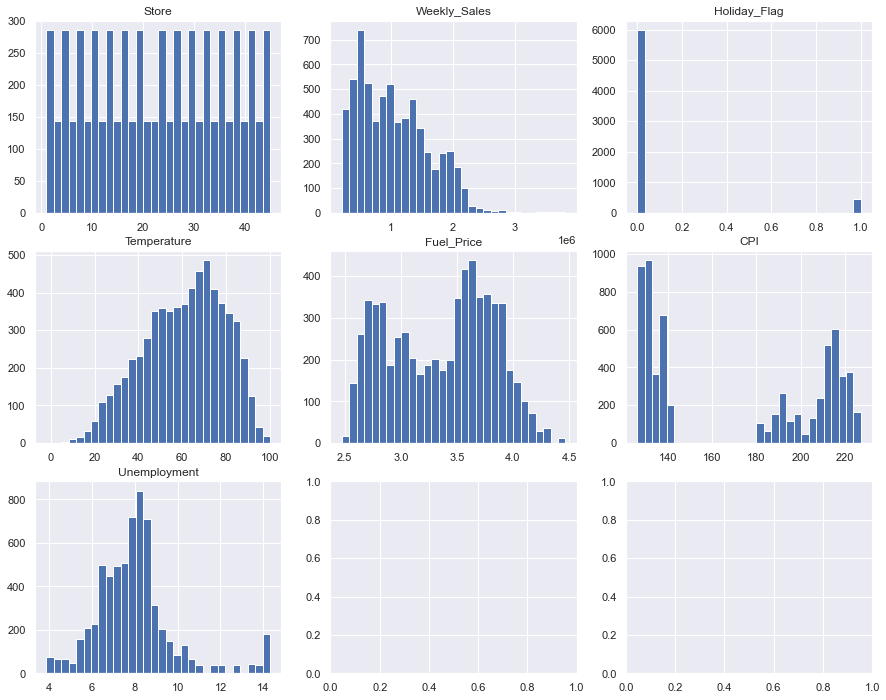

In [16]:
#visualising each features
numer=store.select_dtypes(include='number')
cols=numer.columns
fig,ax=plt.subplots(3,3,figsize=(15,12))
a=0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(numer[cols[a]],bins=30)
        ax[i][j].title.set_text(cols[a])
        a+=1
        if a==7:
            break

In [21]:
cols

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

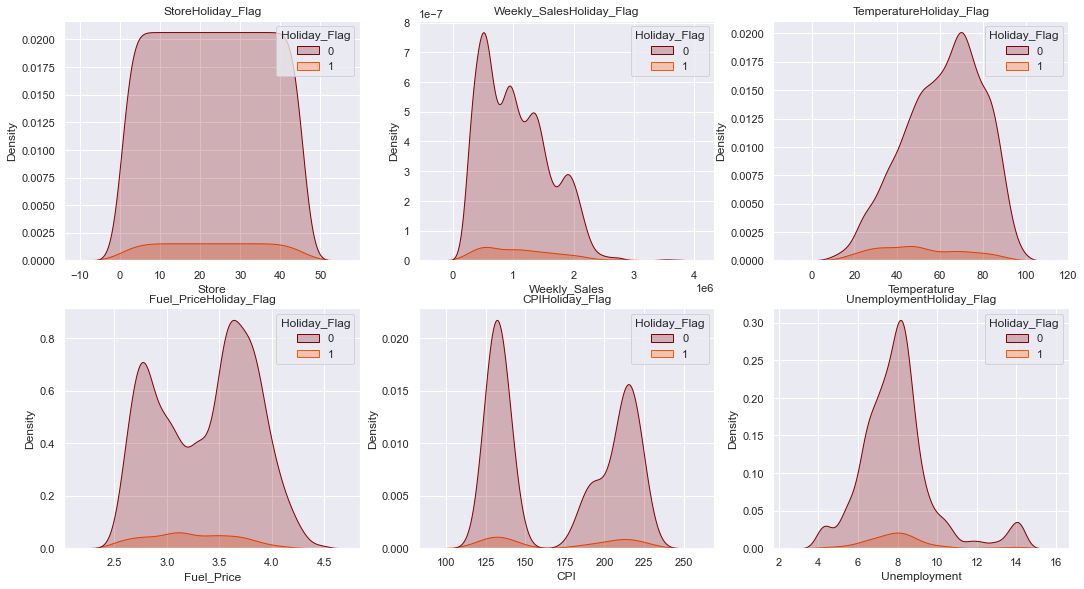

In [29]:
#visualising each features
lst=['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment']
plt.figure(figsize=(18,15))
for i in range(0,len(lst)):
    plt.subplot(3,3,i+1)
    plt.title(lst[i]+'Holiday_Flag')
    sns.kdeplot(data=numer,x=lst[i],hue='Holiday_Flag',shade=True,palette='gist_heat')
plt.show()

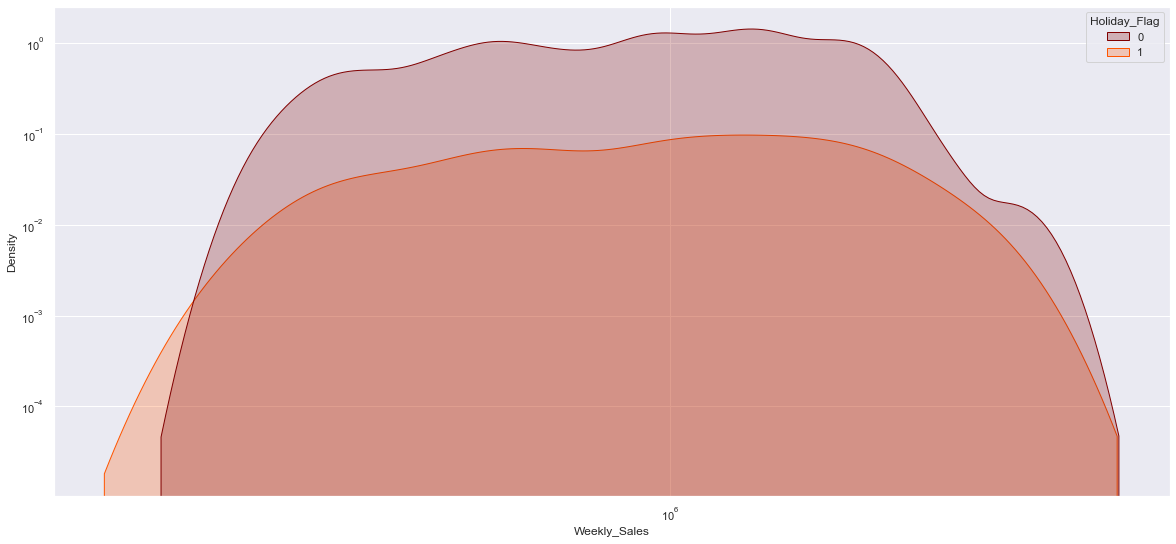

In [31]:
plt.figure(figsize=(20,9))
plt.xscale('log')
plt.yscale('log')
sns.kdeplot(data=numer,x='Weekly_Sales',hue='Holiday_Flag',shade=True,palette='gist_heat');

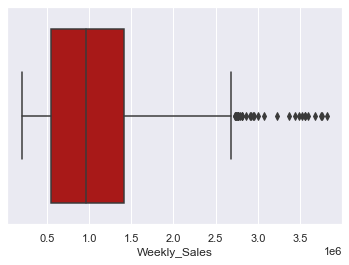

In [36]:
#checking outliers in data
sns.boxplot(data=numer,x='Weekly_Sales',palette='gist_heat');

### Regression Model Building

In [254]:
#importing required library's
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_score,StratifiedKFold
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.metrics         import mean_squared_error,r2_score
import warnings
warnings.simplefilter(action='ignore')

In [44]:
#scaling data 
scale=MinMaxScaler()
store_num=pd.DataFrame(MinMaxScaler().fit_transform(numer.to_numpy()),
                       columns=numer.columns)

In [45]:
store_num

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0.0,0.397291,0.0,0.434149,0.050100,0.840500,0.405118
1,0.0,0.396811,1.0,0.396967,0.038076,0.841941,0.405118
2,0.0,0.388501,0.0,0.410861,0.021042,0.842405,0.405118
3,0.0,0.332458,0.0,0.476419,0.044589,0.842707,0.405118
4,0.0,0.372661,0.0,0.475147,0.076653,0.843008,0.405118
...,...,...,...,...,...,...,...
6430,1.0,0.139437,0.0,0.654990,0.764028,0.651876,0.460514
6431,1.0,0.145057,0.0,0.655088,0.758016,0.653427,0.458884
6432,1.0,0.145337,0.0,0.553131,0.765531,0.654977,0.458884
6433,1.0,0.140810,0.0,0.572701,0.750000,0.655013,0.458884


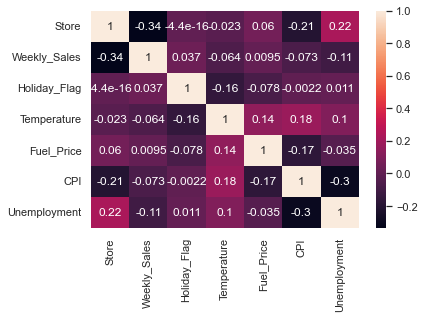

In [46]:
#heatmap for feature selection
sns.heatmap(store_num.corr(),annot=True);

In [65]:
#taking input features and target feature on basis of heatmap
store_sales=store_num[['Store','Weekly_Sales','Temperature','CPI','Unemployment']]
X=store_sales.drop('Weekly_Sales',axis=1)
y=store_sales[['Weekly_Sales']]

In [66]:
#splitting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4504, 4), (1931, 4), (4504, 1), (1931, 1))

In [73]:
#defining function for Linear Regression
def model_lr(X_train,X_test,y_train,y_test):
    global r2_lr,rmse_lr
    
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    
    y_pred=lr.predict(X_test)
    
    r2_lr  =r2_score(y_test,y_pred)
    rmse_lr =mean_squared_error(y_test,y_pred,squared=False)
    
    print('R2-Score: ',r2_lr)
    print('RMSE: ',rmse_lr)

In [74]:
model_lr(X_train,X_test,y_train,y_test)

R2-Score:  0.1477765650553936
RMSE:  0.145159882829471


In [77]:
#defining function for Decsion Tree Regression
def model_dtr(X_train,X_test,y_train,y_test):
    global r2_dtr,rmse_dtr
    
    dtr=DecisionTreeRegressor()
    dtr.fit(X_train,y_train)
    
    y_pred=dtr.predict(X_test)
    
    r2_dtr  =r2_score(y_test,y_pred)
    rmse_dtr =mean_squared_error(y_test,y_pred,squared=False)
    
    print('R2-Score: ',r2_dtr)
    print('RMSE: ',rmse_dtr)

In [78]:
model_dtr(X_train,X_test,y_train,y_test)

R2-Score:  0.8701214103141277
RMSE:  0.056668100411171735


In [79]:
#defining function for KNeigbhors Regression
def model_knn(X_train,X_test,y_train,y_test):
    global r2_knn,rmse_knn
    
    knn=KNeighborsRegressor()
    knn.fit(X_train,y_train)
    
    y_pred=knn.predict(X_test)
    
    r2_knn  =r2_score(y_test,y_pred)
    rmse_knn =mean_squared_error(y_test,y_pred,squared=False)
    
    print('R2-Score: ',r2_knn)
    print('RMSE: ',rmse_knn)

In [80]:
model_knn(X_train,X_test,y_train,y_test)

R2-Score:  0.8485770186149102
RMSE:  0.06118793111933419


In [84]:
#defining function for Bagging(random forest regressor)
def model_rnd(X_train,X_test,y_train,y_test):
    global r2_rnd,rmse_rnd
    
    rnd=RandomForestRegressor()
    rnd.fit(X_train,y_train)
    
    y_pred=rnd.predict(X_test)
    
    r2_rnd  =r2_score(y_test,y_pred)
    rmse_rnd =mean_squared_error(y_test,y_pred,squared=False)
    
    print('R2-Score: ',r2_rnd)
    print('RMSE: ',rmse_rnd)

In [85]:
model_rnd(X_train,X_test,y_train,y_test)

R2-Score:  0.9295770101675512
RMSE:  0.04172795509351299


In [86]:
#defining function for Bossting(Adaboost)
def model_ada(X_train,X_test,y_train,y_test):
    global r2_ada,rmse_ada
    
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    y_pred=ada.predict(X_test)
    
    r2_ada  =r2_score(y_test,y_pred)
    rmse_ada =mean_squared_error(y_test,y_pred,squared=False)
    
    print('R2-Score: ',r2_ada)
    print('RMSE: ',rmse_ada)

In [87]:
model_ada(X_train,X_test,y_train,y_test)

R2-Score:  0.3736072009408292
RMSE:  0.12444952718533778


In [91]:
#defining function for Stacking
def stacking():
    stack=[]
    stack.append(('Lr',LinearRegression()))
    stack.append(('Dtr',DecisionTreeRegressor()))
    stack.append(('KNN',KNeighborsRegressor()))
    stack.append(('rf',RandomForestRegressor()))
    stack.append(('ada',AdaBoostRegressor()))
    meta_model=LinearRegression()
    model=StackingRegressor(estimators=stack,final_estimator=meta_model)
    return model

In [92]:
def model_stc(X_train,X_test,y_train,y_test):
    global r2_stc,rmse_stc
    
    stc=stacking()
    stc.fit(X_train,y_train)
    
    y_pred=stc.predict(X_test)
    
    r2_stc   =r2_score(y_test,y_pred)
    rmse_stc =mean_squared_error(y_test,y_pred,squared=False)
    
    print('R2-Score: ',r2_stc)
    print('RMSE: ',rmse_stc)

In [93]:
model_stc(X_train,X_test,y_train,y_test)

R2-Score:  0.931518411334437
RMSE:  0.04114876318494808


In [95]:
table=pd.DataFrame()
table['Model']   =pd.Series(['Lr','Dtr','KNN','Rf','ADA','STAC'])
table['R2-Score']=pd.Series([r2_lr,r2_dtr,r2_knn,r2_rnd,r2_ada,r2_stc])
table['RMSE']=pd.Series([rmse_lr,rmse_dtr,rmse_knn,rmse_rnd,rmse_ada,rmse_stc])

In [97]:
#comparison table for R2-score and RMSE values for each model
table.sort_values(by='R2-Score',ascending=False)

,Model,R2-Score,RMSE
5,STAC,0.931518,0.041149
3,Rf,0.929577,0.041728
1,Dtr,0.870121,0.056668
2,KNN,0.848577,0.061188
4,ADA,0.373607,0.124450
0,Lr,0.147777,0.145160


## Time Series Analysis

In [98]:
#required library
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [104]:
store =pd.read_csv("C:/Users/acer/Downloads/walmart-sales-dataset-of-45stores.csv",
                   parse_dates=True)
store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [105]:
#chaning date feature datatype to date format
store['Date']=pd.to_datetime(store['Date'])

In [106]:
#checking datatype of each feature
store.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [108]:
#for TSA making date column as index
store.set_index('Date',inplace=True)

In [109]:
#taking weekly sales column for TSA
store_sales=store[['Weekly_Sales']]

In [110]:
store_sales

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,713173.95
2012-05-10,733455.07
2012-12-10,734464.36


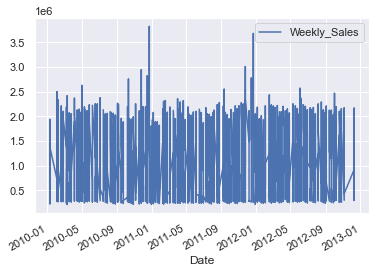

In [253]:
store_sales.plot();

In [221]:
#as there is lot of noise in data therefore we will resample it month wise for better visualization
store_month=store_sales.resample('M').sum()

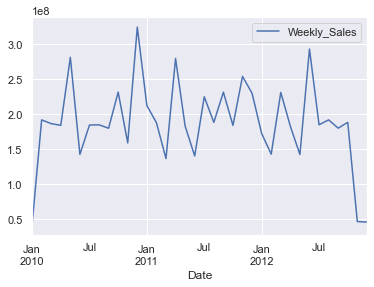

In [222]:
store_month.plot();

In [223]:
decomposition= seasonal_decompose(store_month,period=12)

In [224]:
#decomposition for trend ,seasonality and residual
d_trend   =decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

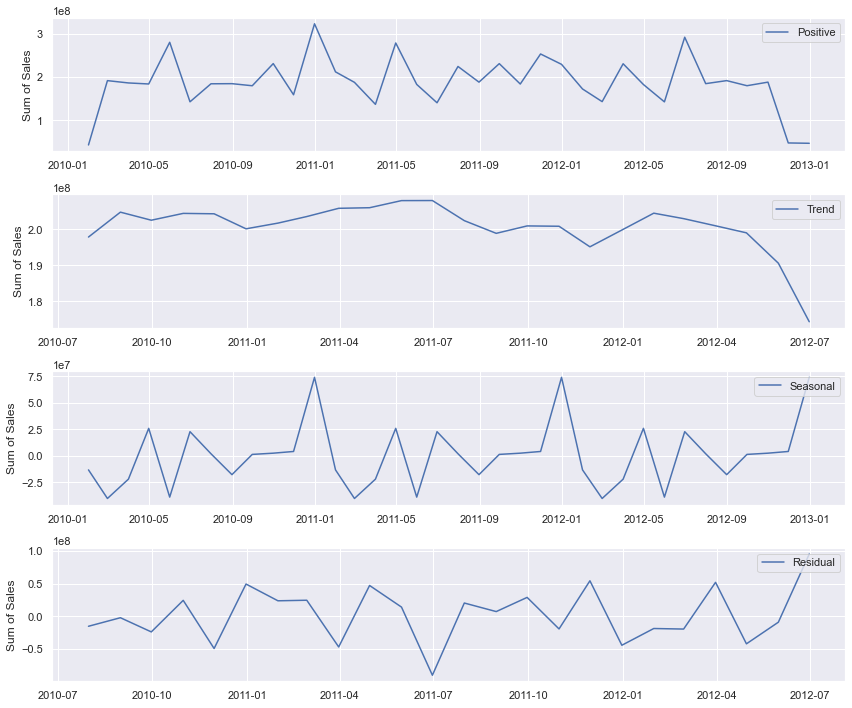

In [225]:
#plotting the graphs
fig,ax=plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(store_month,label='Positive')
ax[0].set_ylabel('Sum of Sales')
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend,label='Trend')
ax[1].set_ylabel('Sum of Sales')
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal,label='Seasonal')
ax[2].set_ylabel('Sum of Sales')
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual,label='Residual')
ax[3].set_ylabel('Sum of Sales')
ax[3].legend(loc='upper right')
           
plt.tight_layout()

In [226]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make it stationary"
        
    return(ret)

In [227]:
checkStationarity(store_month)

'Data is Stationary. Proceed to model building'

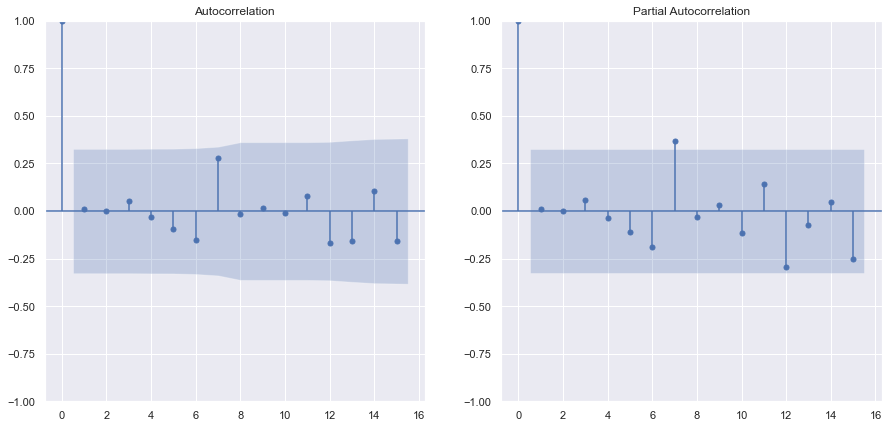

In [228]:
#plotting correlogram for positive sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(store_month,lags=15,ax=ax[0])
plot_pacf(store_month,lags=15,ax=ax[1])
plt.show()

p=[0,1,2,3]

q=[0,1]

d=0

In [229]:
checkStationarity(d_seasonal)

'Data is Stationary. Proceed to model building'

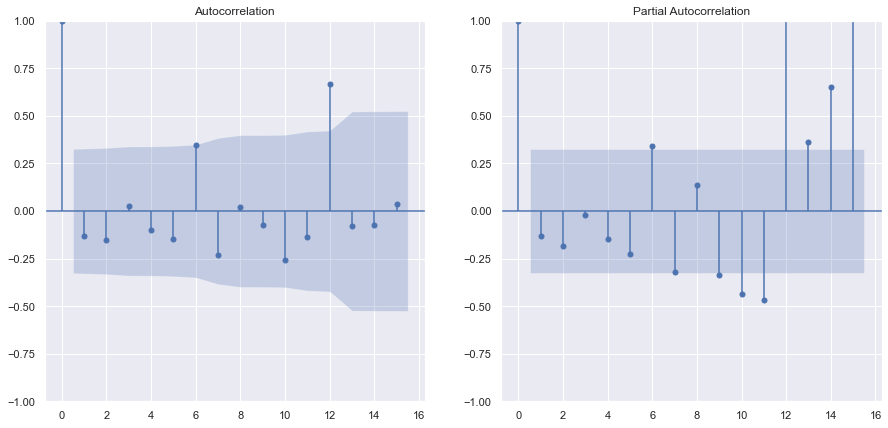

In [236]:
#plotting correlogram for sum of sales data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal,lags=15,ax=ax[0])
plot_pacf(d_seasonal,lags=15,ax=ax[1])
plt.show()

P=[0,1,2,3,4,5,6,7,8]

Q=[0,1,2]

D=0 

In [231]:
# Splitting the data into train and test by row indexing
ss=int(len(store_month)*0.70)
train=store_month[:ss]
test=store_month[ss:]

In [237]:
p=[]
q=[]
P=[]
Q=[]
rmse=[]
aic=[]
for i in range(4):
    for j in range(2):
        for k in range(8):
            for l in range(3):
                sarima=SARIMAX(train,order=(i,0,j),seasonal_order=(k,0,l,12),enforce_stationarity=False).fit()
                p.append(i)
                q.append(j)
                P.append(k)
                Q.append(l)
                pred=sarima.forecast(len(test))
                rmsee=mean_squared_error(test,pred,squared=False)
                rmse.append(rmsee)
                aic.append(sarima.aic)

In [238]:
df_p=pd.DataFrame({'p':p,'q':q,'P':P,'Q':Q,'AIC':aic,'RMSE':rmse})
df_p.sort_values(by=['AIC'],ascending=True)

,p,q,P,Q,AIC,RMSE
2,0,0,0,2,6.000000,1.797767e+08
54,1,0,2,0,8.000000,9.916937e+07
5,0,0,1,2,8.000000,1.797767e+08
26,0,1,0,2,8.000000,1.772316e+08
9,0,0,3,0,8.000000,1.797767e+08
...,...,...,...,...,...,...
96,2,0,0,0,897.049535,6.763148e+07
120,2,1,0,0,897.670437,8.447743e+07
24,0,1,0,0,937.992190,1.754351e+08
48,1,0,0,0,945.306129,7.754976e+07


In [234]:
# defining the model for Time series analysis plot
def TSAplots(data=store_month,train=train,p=1,d=0,q=2,P=0,Q=2,D=0,title="Trend of Sum of Sales"):
    global m2_pos
    m2_pos=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
    f2_pos=m2_pos.predict(0,len(data))
    new_model_pos=SARIMAX(data,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
    fc_pos=new_model_pos.forecast(10)
    plt.subplots(figsize=(12,8))
    plt.plot(data,color='orange',label='Actual')
    plt.plot(fc_pos,color='green',label='Forecast') 
    plt.plot(f2_pos,color='blue',label='Predicted')                     
    plt.title(title,fontsize=14)
    plt.xlabel('Time Period (Monthly)',fontsize=12)
    plt.ylabel('Sum of Sales',fontsize=12)
    plt.legend(loc='best')

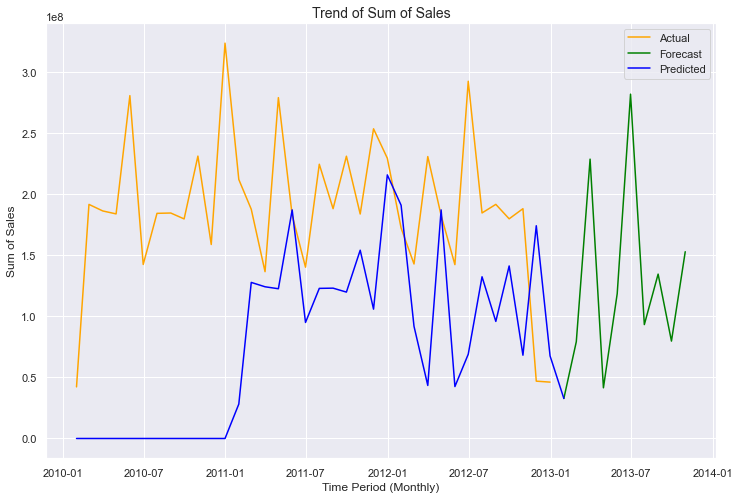

In [250]:
TSAplots(data=store_month,train=train,p=0,d=0,q=0,P=0,Q=2,D=0,title="Trend of Sum of Sales")

In [251]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [252]:
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                  Weekly_Sales   No. Observations:                   25
Model:             SARIMAX(0, 0, [1, 2], 12)   Log Likelihood                -506.821
Date:                       Fri, 03 Feb 2023   AIC                           1019.642
Time:                               12:57:18   BIC                           1023.298
Sample:                           01-31-2010   HQIC                          1020.656
                                - 01-31-2012                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       1.9988      0.520      3.843      0.000       0.980       3.018
ma.S.L24       0.9996      1.133      0.882      0.378      -1.221       3.220
sigma2      2.764e+15   6.23e-16   4.44e+30      0.000    2.76e+15    2.76e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.32   Prob(JB):                         0.70
Heteroskedasticity (H):               0.34   Skew:                            -0.12
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+46. Standard errors may be unstable.
"""